#  **Phần 2.Thực hành**

# **I. Pytorch & Torchtext**

In [1]:
!pip install -q torch==2.1.0
!pip install -q torchtext==0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 863.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## **1. Index-based Representation**

In [ ]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 8

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()

{'food': 5, 'eats': 4, 'bites': 3, 'meat': 6, 'man': 2, 'dog': 1, '<unk>': 0}

In [ ]:
vocab(tokenizer("dog bites man"))

[1, 3, 2]

In [ ]:
vocab(tokenizer("dog and man"))

[1, 0, 2]

## **2. Padding**

In [ ]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 8

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<pad>", "<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()['<pad>']

0

In [ ]:
from torchtext.transforms import PadTransform

# define padding
max_len = 4
pad_id = vocab.get_stoi()['<pad>']
padder = PadTransform(max_len, pad_id)

input = torch.tensor([2, 4, 3])
padded_input = padder(input)
padded_input

tensor([2, 4, 3, 0])

## **3. Truncating**

In [ ]:
from torchtext.transforms import Truncate

# define padding
max_len = 3
truncater = Truncate(max_len)

input = [2, 2, 4, 3]
truncated_input = truncater(input)
truncated_input

[2, 2, 4]

## **4. Embedding Layer**

In [ ]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 3
embedding = nn.Embedding(vocab_size, embedding_dim)
embedding.weight

Parameter containing:
tensor([[ 0.8310, -0.4816,  0.5637],
        [-1.0570,  1.9667, -0.5154],
        [-0.0916, -0.6407, -0.4012],
        [-1.3703, -0.6625, -0.0936],
        [ 0.1381, -0.5792, -0.3179],
        [-0.3531, -0.4289, -0.0364],
        [ 1.3897, -0.3511, -0.5632]], requires_grad=True)

In [ ]:
import torch

input = torch.LongTensor([[1, 2, 4], [4, 3, 2]])
embedding(input)

tensor([[[-1.0570,  1.9667, -0.5154],
         [-0.0916, -0.6407, -0.4012],
         [ 0.1381, -0.5792, -0.3179]],

        [[ 0.1381, -0.5792, -0.3179],
         [-1.3703, -0.6625, -0.0936],
         [-0.0916, -0.6407, -0.4012]]], grad_fn=<EmbeddingBackward0>)

## **5. EmbeddingBag**

In [ ]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 4
embedding_sum = nn.EmbeddingBag(vocab_size, embedding_dim, mode='sum')
embedding_sum.weight

Parameter containing:
tensor([[ 0.6231, -0.4284,  0.6286, -0.9344],
        [-1.7171, -0.3195, -0.4965, -1.3423],
        [ 0.9913,  1.0253, -1.1656,  0.2719],
        [-1.3928, -0.2498,  0.6202, -1.2237],
        [-1.5505, -0.1044, -0.1157,  1.0971],
        [ 0.5661,  0.7837, -1.5399,  0.2079],
        [-0.0729,  0.9252, -0.7904, -0.0219]], requires_grad=True)

In [ ]:
inputs = torch.tensor([1, 2, 4, 5, 4, 3], dtype=torch.long)
offsets = torch.tensor([0, 3], dtype=torch.long)
embedding_sum(inputs, offsets)

tensor([[-2.2763,  0.6014, -1.7778,  0.0267],
        [-2.3773,  0.4295, -1.0354,  0.0813]], grad_fn=<EmbeddingBagBackward0>)

In [ ]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 4
embedding_sum = nn.EmbeddingBag(vocab_size, embedding_dim, mode='mean')
embedding_sum.weight

Parameter containing:
tensor([[-2.7284, -0.0210, -1.0843, -0.6526],
        [ 0.1739, -0.8590,  0.5602, -0.6712],
        [-0.0458,  0.5412,  0.3697,  1.8990],
        [-0.8236, -0.4745, -0.2241,  0.1473],
        [ 0.0764,  0.9798, -1.3858, -0.9106],
        [-2.2137, -0.2522,  0.3889,  1.6111],
        [-0.9347, -0.7129,  0.5359,  0.6122]], requires_grad=True)

In [ ]:
inputs = torch.tensor([1, 2, 4, 5, 4, 3], dtype=torch.long)
offsets = torch.tensor([0, 3], dtype=torch.long)
embedding_sum(inputs, offsets)

tensor([[ 0.0682,  0.2207, -0.1520,  0.1057],
        [-0.9870,  0.0844, -0.4070,  0.2826]], grad_fn=<EmbeddingBagBackward0>)

# **Text Classification**

## **1.Tải về bộ dữ liệu NTC-SCV**

In [2]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 39 (delta 0), reused 4 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (39/39), 186.94 MiB | 31.90 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (11/11), done.


In [3]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data
!rm -rf ./ntc-scv

Streaming output truncated to the last 5000 lines.
  inflating: ./data/data_train/train/pos/31228.txt  
  inflating: ./data/data_train/train/pos/3123.txt  
  inflating: ./data/data_train/train/pos/31232.txt  
  inflating: ./data/data_train/train/pos/31233.txt  
  inflating: ./data/data_train/train/pos/31234.txt  
  inflating: ./data/data_train/train/pos/31236.txt  
  inflating: ./data/data_train/train/pos/31238.txt  
  inflating: ./data/data_train/train/pos/31240.txt  
  inflating: ./data/data_train/train/pos/31242.txt  
  inflating: ./data/data_train/train/pos/31247.txt  
  inflating: ./data/data_train/train/pos/31250.txt  
  inflating: ./data/data_train/train/pos/31251.txt  
  inflating: ./data/data_train/train/pos/31252.txt  
  inflating: ./data/data_train/train/pos/31257.txt  
  inflating: ./data/data_train/train/pos/31260.txt  
  inflating: ./data/data_train/train/pos/31261.txt  
  inflating: ./data/data_train/train/pos/31262.txt  
  inflating: ./data/data_train/train/pos/31273.tx

In [4]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

In [5]:
folder_paths = {
    'train': './data/data_train/train',
    'valid': './data/data_train/test',
    'test': './data/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

In [6]:
train_df.head(10)

,sentence,label
0,Bản_thân mình ăn_ở đây thấy thật_sự không vừa_...,0
1,Các món kho_tộ ở đây làm dầu_mỡ nhiều quá với ...,0
2,Đã ăn_ở đây 1 lần và ko bao_giờ quay lại . Có ...,0
3,Nhóm mình 7 đứa đi ăn_ở đây hôm 2/12 thiệt là ...,0
4,ngày 1-1 và các ngày lễ Tết ... nếu các bạn mu...,0
5,"Ui , ăn_ở đây đúng là ám mùi kinh luôn í . Phầ...",0
6,"Món bít tết rất bình_thường , không muốn nói l...",0
7,Hôm_nay đến ăn 1 phần mango phô_mai . Xoài thì...,0
8,Trời mưa khách vào uống trà sữa trú mưa thì vừ...,0
9,"Thấy trên foody nhiều người khen ngon , 1 đám ...",0


## **2. Tiền xử lý dữ liệu**

Với bộ dữ liệu NTC-SCV có một số bình luận viết bằng tiếng anh hoặc tiếng pháp và chứ các thẻ HTML, đường dẫn URLs. Tiền xử lý dữ liệu gồm 2 bước:

- Xoá bỏ những bình luận không phải tiếng việt

### **2.1. Language Detection**

In [7]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=5abaf7005c9114c39e96baa2a1af9311d1bb4fd4c2b4898e4e2b86b781510f55
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [8]:
from langid.langid import LanguageIdentifier, model

def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [9]:
train_df_vi, train_df_other = identify_vn(train_df)

In [10]:
train_df_vi

,sentence,label
0,Bản_thân mình ăn_ở đây thấy thật_sự không vừa_...,0
1,Các món kho_tộ ở đây làm dầu_mỡ nhiều quá với ...,0
2,Đã ăn_ở đây 1 lần và ko bao_giờ quay lại . Có ...,0
3,Nhóm mình 7 đứa đi ăn_ở đây hôm 2/12 thiệt là ...,0
4,ngày 1-1 và các ngày lễ Tết ... nếu các bạn mu...,0
...,...,...
29995,Lúc mình còn học cấp 3 trường Phan_Châu_Trinh ...,1
29996,Decor rất đẹp nha . Từ cổng vào cho tới nhà_vệ...,1
29997,Hôm trước đi thấy qán phục_vụ nhanh nhưng hôm ...,1
29998,"- Mashmallow : là nhân_vật chính của tiệm , tu...",1


In [11]:
train_df_other

,sentence,label
144,I had a very disappointing experience here . I...,0
190,def trying to be like l ' usine design wise . ...,0
449,Expensive because it is located at district 1 ...,0
458,Drinks are delicicious yet the services are so...,0
500,"The selection of beer is quite good , but the ...",0
...,...,...
29572,The space is decorated perfectly inside out th...,1
29597,We just drove pass the place and turn around t...,1
29626,"Today was supprise by Icon new drink , should ...",1
29705,"On some lazy days , we was at home and nothing...",1


- Làm sạch dữ liệu

 Các bước tiền làm sạch liệu:

 – Xoá bỏ thẻ HTML, đường dẫn URL

 – Xoá bỏ dấu câu, số

 – Xoá bỏ các ký tự đặc biệt, emoticons,...

 – Chuẩn hoá khoảng trắng

 – Chuyển sang viết thường

In [12]:
import re
import string

def preprocess_text(text):

  url_pattern = re.compile(r'https?://\s+/www\.\s+')
  text = url_pattern.sub(r" ", text)

  html_pattern = re.compile('<[^<>]+>')
  text = html_pattern.sub(" ", text)

  replace_chars = list(string.punctuation + string.digits)
  for char in replace_chars:
    text = text.replace(char, " ")

  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r" ", text)

  text = re.sub(r"\s+", " ", text).strip()

  return text.lower()

In [14]:
train_df_vi['sentence'][0]

'Bản_thân mình ăn_ở đây thấy thật_sự không vừa_miệng lắm : ( một đĩa bánh_cuốn mà được ít bánh lắm , nước_chấm cũng không có gì nổi_bật , vị không ngon như mình tưởng . Trứng thì ăn được . Nói_chung đi một lần cho_biết chứ cũng không có ý_định quay lại : p\n'

In [15]:
preprocess_text(train_df_vi['sentence'][0])

'bản thân mình ăn ở đây thấy thật sự không vừa miệng lắm một đĩa bánh cuốn mà được ít bánh lắm nước chấm cũng không có gì nổi bật vị không ngon như mình tưởng trứng thì ăn được nói chung đi một lần cho biết chứ cũng không có ý định quay lại p'

In [16]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

<ipython-input-16-e21d2b59a2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


In [17]:
train_df

,sentence,label
0,Bản_thân mình ăn_ở đây thấy thật_sự không vừa_...,0
1,Các món kho_tộ ở đây làm dầu_mỡ nhiều quá với ...,0
2,Đã ăn_ở đây 1 lần và ko bao_giờ quay lại . Có ...,0
3,Nhóm mình 7 đứa đi ăn_ở đây hôm 2/12 thiệt là ...,0
4,ngày 1-1 và các ngày lễ Tết ... nếu các bạn mu...,0
...,...,...
29995,Lúc mình còn học cấp 3 trường Phan_Châu_Trinh ...,1
29996,Decor rất đẹp nha . Từ cổng vào cho tới nhà_vệ...,1
29997,Hôm trước đi thấy qán phục_vụ nhanh nhưng hôm ...,1
29998,"- Mashmallow : là nhân_vật chính của tiệm , tu...",1


In [18]:
valid_df

,sentence,label,preprocess_sentence
0,Hồi kì tới đây vs bạn 1 lần nhưng_mà thấy cgv ...,0,hồi kì tới đây vs bạn lần nhưng mà thấy cgv nà...
1,Bọn mình ghé quán vào trưa thứ 4 nên quán vắng...,0,bọn mình ghé quán vào trưa thứ nên quán vắng t...
2,Có code khuyễn mãi mua 1 viên tặng thêm viên n...,0,có code khuyễn mãi mua viên tặng thêm viên nữa...
3,"Quán này ở gần nhà mình , mỗi lần đi ngang là ...",0,quán này ở gần nhà mình mỗi lần đi ngang là bị...
4,Đi ngang qua thấy 2 vợ_chồng bán bánh_tráng nư...,0,đi ngang qua thấy vợ chồng bán bánh tráng nướn...
...,...,...,...
9995,Với mấy em cún với mèo thì nhìn cưng quá cưng ...,1,với mấy em cún với mèo thì nhìn cưng quá cưng ...
9996,"Quán nằm kế bên tiệm bánh siu siu , bao_gồm cả...",1,quán nằm kế bên tiệm bánh siu siu bao gồm cả b...
9997,Đây là quán sushi ruột của mình lun . Lần đầu ...,1,đây là quán sushi ruột của mình lun lần đầu tớ...
9998,Cảm_nhận riêng khi tới quán là quán có không_g...,1,cảm nhận riêng khi tới quán là quán có không g...


In [19]:
test_df

,sentence,label,preprocess_sentence
0,Hình_như bộ ghế thấp quá đến_nỗi phục_vụ không...,0,hình như bộ ghế thấp quá đến nỗi phục vụ không...
1,"Tầng một ở đây trang_trí đẹp , lên tầng 2 thì ...",0,tầng một ở đây trang trí đẹp lên tầng thì khôn...
2,"Ốc Ù , thấy 1 người bạn trong Foody pr nên qua...",0,ốc ù thấy người bạn trong foody pr nên qua ăn ...
3,"Lâu rồi mới ghé lại , ủa sao mọi lần ly 25k to...",0,lâu rồi mới ghé lại ủa sao mọi lần ly k to cao...
4,Mình thấy web rất đẹp và rất tiện_dụng nên hôm...,0,mình thấy web rất đẹp và rất tiện dụng nên hôm...
...,...,...,...
9995,"Bình_thường\n Suki giống lẩu thái , chỉ bớt ca...",1,bình thường suki giống lẩu thái chỉ bớt cay hơ...
9996,"ĐIỂM 10 CHẤT_LƯỢNG\n Món ăn hấp_dẫn , sợi mì d...",1,điểm chất lượng món ăn hấp dẫn sợi mì dẻo ngon...
9997,Lần đầu thấy 1 quán gà rán mà ngon đến vậy . T...,1,lần đầu thấy quán gà rán mà ngon đến vậy thịt ...
9998,Chờ quán mở_cửa và cuối_cùng cũng được đi rồi ...,1,chờ quán mở cửa và cuối cùng cũng được đi rồi ...


### **2.3. EDA**

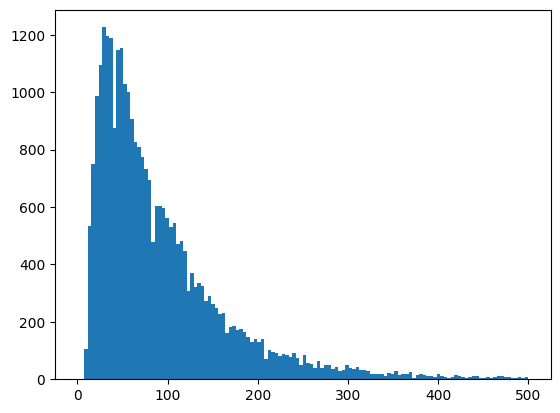

In [20]:
import matplotlib.pyplot as plt

plt.hist([len(sentence.split()) for sentence in train_df_vi['preprocess_sentence']], bins=128, range=(0, 500))
plt.show()

In [21]:
# count: words and vocabulary
from collections import Counter

words = []
[[words.append(word) for word in sentence.split()] for sentence in train_df_vi['preprocess_sentence']]
vocabulary = Counter(words)
len(vocabulary), len(words)

(17244, 2856797)

 ## **3. Biểu diễn dữ liệu văn bản thành các vectors**

Để biểu diễn dữ liệu văn bản thành các đặc trưng (vectors), chúng ta sử dụng thư viện torchtext.

In [ ]:
!pip install -q torch==2.1.0
!pip install -q torchtext==0.16.0

In [22]:
# word-based tokenizer
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [23]:
def yield_tokens(sentences, tokenizer):
  for sentence in sentences:
    yield tokenizer(sentence)

In [24]:
tokenizer(train_df_vi['preprocess_sentence'][0])[:5]

['bản', 'thân', 'mình', 'ăn', 'ở']

In [25]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

In [26]:
len(vocabulary)

10000

In [27]:
# encode text

print(vocabulary(tokenizer(train_df_vi['preprocess_sentence'][0])))

[639, 192, 2, 1, 18, 19, 23, 196, 167, 5, 85, 243, 66, 80, 483, 31, 569, 15, 27, 179, 31, 66, 48, 370, 9, 5, 3, 75, 334, 779, 52, 5, 10, 28, 2, 439, 336, 7, 1, 27, 38, 114, 22, 80, 40, 32, 120, 157, 9, 5, 3, 156, 325, 128, 20, 228]


In [28]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

In [29]:
print(next(iter(train_dataset)))

([639, 192, 2, 1, 18, 19, 23, 196, 167, 5, 85, 243, 66, 80, 483, 31, 569, 15, 27, 179, 31, 66, 48, 370, 9, 5, 3, 75, 334, 779, 52, 5, 10, 28, 2, 439, 336, 7, 1, 27, 38, 114, 22, 80, 40, 32, 120, 157, 9, 5, 3, 156, 325, 128, 20, 228], 0)


In [30]:
len(train_dataset)

29736

### Dataloader

In [37]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
  encoded_sentences, labels, offsets = [], [], [0]
  for encoded_sentence, label in batch:
    labels.append(label)
    encoded_sentence = torch.tensor(encoded_sentence, dtype=torch.int64)
    encoded_sentences.append(encoded_sentence)
    offsets.append(encoded_sentence.size(0))

  labels = torch.tensor(labels, dtype=torch.int64)
  offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
  encoded_sentences = torch.cat(encoded_sentences)
  return encoded_sentences.to(device), offsets.to(device), labels.to(device)

In [39]:
from torch.utils.data import DataLoader

batch_size = 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)

In [40]:
next(iter(train_dataloader))

(tensor([1371,    4,   68,  ...,   68,  128,   20]),
 tensor([    0,   470,   596,   634,   677,   715,  1027,  1084,  1189,  1224,
          1345,  1366,  1385,  1452,  1570,  1642,  1915,  1936,  2092,  2186,
          2369,  2391,  2561,  2590,  2748,  2789,  2818,  2886,  3172,  3249,
          3319,  3420,  3445,  3695,  3772,  3828,  3891,  3974,  4074,  4167,
          4327,  4485,  4497,  4618,  4680,  4700,  4770,  4795,  4831,  4854,
          4887,  5006,  5184,  5198,  5260,  5289,  5311,  5382,  5444,  5540,
          5590,  5610,  5638,  5944,  6064,  6164,  6329,  6376,  6412,  6598,
          6638,  6659,  6723,  6744,  6772,  6807,  6862,  6923,  6956,  7071,
          7151,  7212,  7253,  7311,  7350,  7447,  7481,  7525,  7601,  7629,
          7698,  8026,  8073,  8245,  8321,  8378,  8430,  8514,  8765,  8819,
          8914,  9013,  9095,  9203,  9433,  9471,  9569,  9600,  9662,  9690,
          9744,  9762,  9791,  9810,  9859,  9924,  9983, 10120, 10184, 10413,

In [41]:
encoded_sentences, offsets, labels = next(iter(train_dataloader))

In [42]:
encoded_sentences.shape

torch.Size([11677])

## **4.Xây dựng mô hình phân loại**

### Embedding

In [43]:
from torch import nn

class TextClassificationModel(nn.Module):
  def __init__(self, vocab_size, embed_dim, num_class, seq_len):
    super(TextClassificationModel, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embed_dim)
    self.ft = nn.Flatten()
    self.fc = nn.Linear(seq_len*embed_dim, num_class)
    self.init_weights()

  def init_weights(self):
    initrange = 0.5
    self.embedding.weight.data.uniform_(-initrange, initrange)
    self.fc.weight.data.uniform_(-initrange, initrange)
    self.fc.bias.data.zero_()

  def forward(self, inputs):
    embedded = self.embedding(inputs)
    output = self.ft(embedded)
    return self.fc(output)

In [44]:
batch_size = 5
seq_len = 10
input = torch.ones([batch_size, seq_len], dtype=torch.int32)
input

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)

In [45]:
num_class = 2
vocab_size = 5000
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class, seq_len)

In [46]:
model

TextClassificationModel(
  (embedding): Embedding(5000, 100)
  (ft): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1000, out_features=2, bias=True)
)

In [47]:
predictions = model(input)
predictions

tensor([[-0.1495, -0.7706],
        [-0.1495, -0.7706],
        [-0.1495, -0.7706],
        [-0.1495, -0.7706],
        [-0.1495, -0.7706]], grad_fn=<AddmmBackward0>)

In [48]:
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, inputs, offsets):
        embedded = self.embedding(inputs, offsets)
        return self.fc(embedded)

In [49]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 256
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

In [50]:
model

TextClassificationModel(
  (embedding): EmbeddingBag(10000, 256, mode='mean')
  (fc): Linear(in_features=256, out_features=2, bias=True)
)

In [51]:
predictions = model(encoded_sentences, offsets)

In [52]:
predictions

tensor([[-1.0906e-01, -6.6421e-02],
        [ 3.8195e-01,  2.1766e-01],
        [-1.4268e-01, -2.5171e-01],
        [-3.4009e-01, -7.8634e-02],
        [ 1.1339e-02, -1.8178e-01],
        [-1.3414e-01, -3.8606e-01],
        [-2.6610e-01, -2.7942e-02],
        [ 3.0165e-02, -1.2883e-01],
        [ 6.7211e-02, -1.8946e-01],
        [-9.6537e-02,  5.7564e-03],
        [-1.8239e-01,  1.9856e-01],
        [ 7.9028e-02,  3.6505e-01],
        [-6.5337e-02, -1.8288e-01],
        [-4.0707e-01,  4.2872e-01],
        [-5.0892e-01, -5.5194e-01],
        [-8.5431e-02, -7.5448e-02],
        [ 2.1467e-01, -1.8094e-03],
        [ 8.2501e-02, -7.1709e-02],
        [ 2.0927e-01,  1.3769e-01],
        [ 6.6936e-03,  1.1293e-01],
        [-1.6864e-01,  1.3794e-01],
        [-2.5536e-02, -4.6003e-02],
        [-9.2413e-02, -1.0205e-01],
        [ 2.8040e-02, -1.7423e-01],
        [ 1.0819e-01,  5.2488e-02],
        [-1.3124e-01, -4.4716e-01],
        [ 2.2899e-02,  1.0915e-01],
        [-6.6836e-02, -3.002

In [53]:
learning_rate = 5

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [54]:
loss = criterion(predictions, labels)

In [55]:
loss

tensor(0.6765, grad_fn=<NllLossBackward0>)

## **5. Huấn luyện mô hình**

In [56]:
import time

def train(model, optimizer, criterion, train_dataloader, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, offsets, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        predictions = model(inputs, offsets)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

Định nghĩa hàm đánh giá

In [57]:
def evaluate(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, offsets, labels) in enumerate(valid_dataloader):
            predictions = model(inputs, offsets)
            loss = criterion(predictions, labels)
            losses.append(loss)
            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [58]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

learning_rate = 5
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 10
for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()
    train_acc, train_loss = train(model, optimizer, criterion, train_dataloader, epoch)
    eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)
    print("-" * 59)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

| epoch   1 |    50/  233 batches | accuracy    0.682
| epoch   1 |   100/  233 batches | accuracy    0.797
| epoch   1 |   150/  233 batches | accuracy    0.831
| epoch   1 |   200/  233 batches | accuracy    0.831
-----------------------------------------------------------
| End of epoch   1 | Time:  2.50s | Train Accuracy    0.845 | Train Loss    0.461 | Valid Accuracy    0.846 | Valid Loss    0.393 
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.852
| epoch   2 |   100/  233 batches | accuracy    0.855
| epoch   2 |   150/  233 batches | accuracy    0.864
| epoch   2 |   200/  233 batches | accuracy    0.863
-----------------------------------------------------------
| End of epoch   2 | Time:  2.31s | Train Accuracy    0.867 | Train Loss    0.360 | Valid Accuracy    0.860 | Valid Loss    0.374 
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.867
| epoch   3 

## **7. Dự đoán và đánh giá mô hình**

In [59]:
def predict(text):
    with torch.no_grad():
        encoded = torch.tensor(vocabulary(tokenizer(text)))
        output = model(encoded, torch.tensor([0]))
        return output.argmax(1).item()

In [60]:
# compute accuracy on test set

predictions, labels = [], []
for index, row in test_df.iterrows():
    sentence = row['preprocess_sentence']
    label = row['label']
    prediction = predict(sentence)
    predictions.append(prediction)
    labels.append(label)

sum(torch.tensor(predictions) == torch.tensor(labels))/len(labels)

tensor(0.8783)

## **8. Compare: BoW, TF-IDF**

### 8.1. BoW

In [61]:
import numpy as np

train_labels = np.array(train_df_vi['label'].tolist())
test_labels = np.array(test_df['label'].tolist())

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 10000
vectorizer = CountVectorizer(max_features=max_features)

train_sequences = vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_sequences = vectorizer.transform(test_df['preprocess_sentence'])
vocab_size = len(vectorizer.vocabulary_)
vocab_size

10000

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_sequences, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
logreg.score(test_sequences, test_labels)

0.8779

### 8.2. TF-IDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 10000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

train_sequences = tfidf_vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_sequences = tfidf_vectorizer.transform(test_df['preprocess_sentence'])

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_sequences, train_labels)

LogisticRegression()

In [67]:
logreg.score(test_sequences, test_labels)

0.8822

#  **Phần 3. Câu hỏi trắc nghiệm**

### Câu 1

In [68]:
# Đáp án: A

### Câu 2

In [69]:
# Đáp án: A

### Câu 3

In [70]:
# Đáp án: B

### Câu 4

In [71]:
# Đáp án: C

### Câu 5

In [72]:
# Đáp án: A

### Câu 6

In [73]:
# Đáp án: A

### Câu 7

In [74]:
# Đáp án: B

### Câu 8

In [75]:
# Đáp án: B

### Câu 9

In [76]:
# Đáp án: A

### Câu 10

In [77]:
# Đáp án: C

### Câu 11

In [78]:
# Đáp án: D

### Câu 12

In [79]:
# Đáp án: A

### Câu 13

In [80]:
# Đáp án: B